<a href="https://colab.research.google.com/github/gideon525/Business-Location/blob/main/UsedCars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Installing the libraries with the specified version
!pip install --no-deps tensorflow==2.18.0 scikit-learn==1.3.2 matplotlib===3.8.3 seaborn==0.13.2 numpy==1.26.4 pandas==2.2.2 -q --user --no-warn-script-location

In [35]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import time

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [36]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

**Loading The Dataset**

In [37]:
# uncomment and run the following lines in case Google Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
data = pd.read_csv('used_cars_data.csv')

**Data Overview**

# Displaying The First Few Rows of the Dataset

In [39]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
0,Mumbai,2010,72000.0,CNG,Manual,First,5.0,5.51,1.75,26.60,998.0,58.16,maruti,wagon
1,Pune,2015,41000.0,Diesel,Manual,First,5.0,16.06,12.50,19.67,1582.0,126.20,hyundai,creta
2,Chennai,2011,46000.0,Petrol,Manual,First,5.0,8.61,4.50,18.20,1199.0,88.70,honda,jazz
3,Chennai,2012,87000.0,Diesel,Manual,First,7.0,11.27,6.00,20.77,1248.0,88.76,maruti,ertiga
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,53.14,17.74,15.20,1968.0,140.80,audi,a4


**Checking the Shape of the dataset**

In [40]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7252 rows and 14 columns.


**Checking 10 random rows of the dataset**

**Observations**

In [41]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

**Checking the data types of the column for the dataset**

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Year               7252 non-null   int64  
 2   Kilometers_Driven  7251 non-null   float64
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Seats              7199 non-null   float64
 7   New_Price          7252 non-null   float64
 8   Price              6019 non-null   float64
 9   mileage_num        7169 non-null   float64
 10  engine_num         7206 non-null   float64
 11  power_num          7077 non-null   float64
 12  Brand              7252 non-null   object 
 13  Model              7252 non-null   object 
dtypes: float64(7), int64(1), object(6)
memory usage: 793.3+ KB


**Observations**


*   6 columns are of the object type columns, and 7 columns are of the numerical type




In [43]:
# checking for duplicate values
df.duplicated().sum()

np.int64(2)

In [44]:
df[df.duplicated(keep=False) == True]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
3623,Hyderabad,2007,52195.0,Petrol,Manual,First,5.0,4.36,1.75,19.7,796.0,46.3,maruti,alto
4781,Hyderabad,2007,52195.0,Petrol,Manual,First,5.0,4.36,1.75,19.7,796.0,46.3,maruti,alto
6940,Kolkata,2017,13000.0,Diesel,Manual,First,5.0,13.58,NaN,26.0,1498.0,98.6,honda,city
7077,Kolkata,2017,13000.0,Diesel,Manual,First,5.0,13.58,NaN,26.0,1498.0,98.6,honda,city


**Observations**
We drop the rows the duplicate occurs

In [45]:
df.drop(4781, inplace=True)
df.drop(6940, inplace=True)

In [46]:
# checking for duplicate values
df.duplicated().sum()

np.int64(0)

**Checking for missing values**

In [47]:
df.isnull().sum()

,0
Location,0
Year,0
Kilometers_Driven,1
Fuel_Type,0
Transmission,0
Owner_Type,0
Seats,53
New_Price,0
Price,1232
mileage_num,83




*   There are missing values in kilometers_Driven, Seats, Price, Mileage_num
*   We will drop the rows where Price is missing as it is the target variable before splitting the data



**Exploratory Data Analysis EDA Summary**


In [48]:
# function to create labelled barplots
def create_labelled_barplots(data, feature, title, x_label, y_label, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    title: title of the plot
    x_label: x-axis label
    y_label: y-axis label
    perc: whether to display percentages instead of count (default is false)
    n: display the top n category levels ( default is None, i.e, display all levels)
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [49]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Univariate Analysis**

In [50]:
# creating a copy of the dataframe
df1 = df.copy()

Price

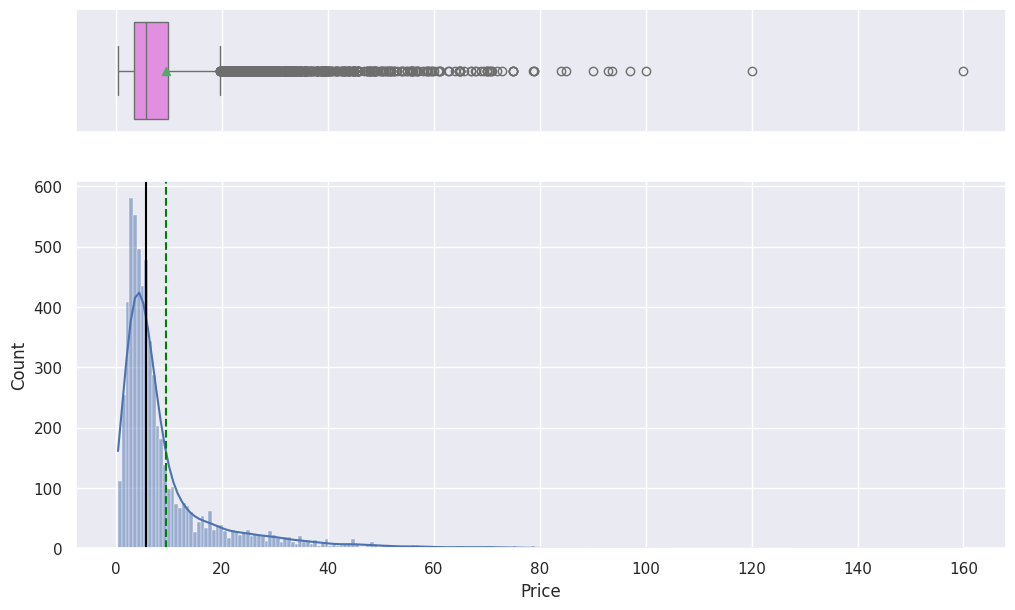

In [51]:
histogram_boxplot(df1, "Price", kde=True)

**Observations**


*   This is a highly skewed distribution



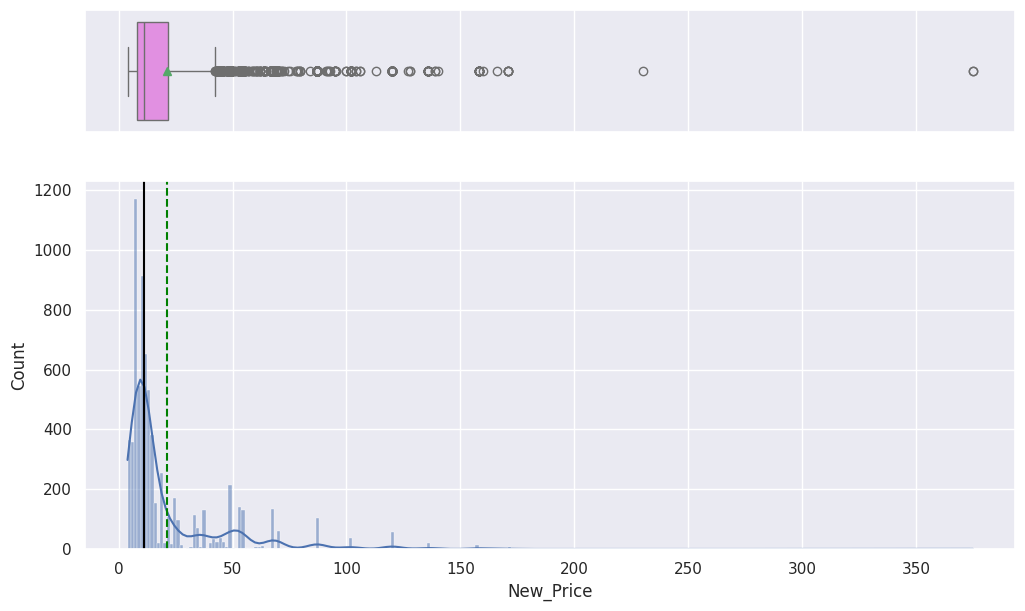

In [52]:
histogram_boxplot(df1, "New_Price", kde=True)

**Observations**


*   This is another highly skewed distribution



**Brand**

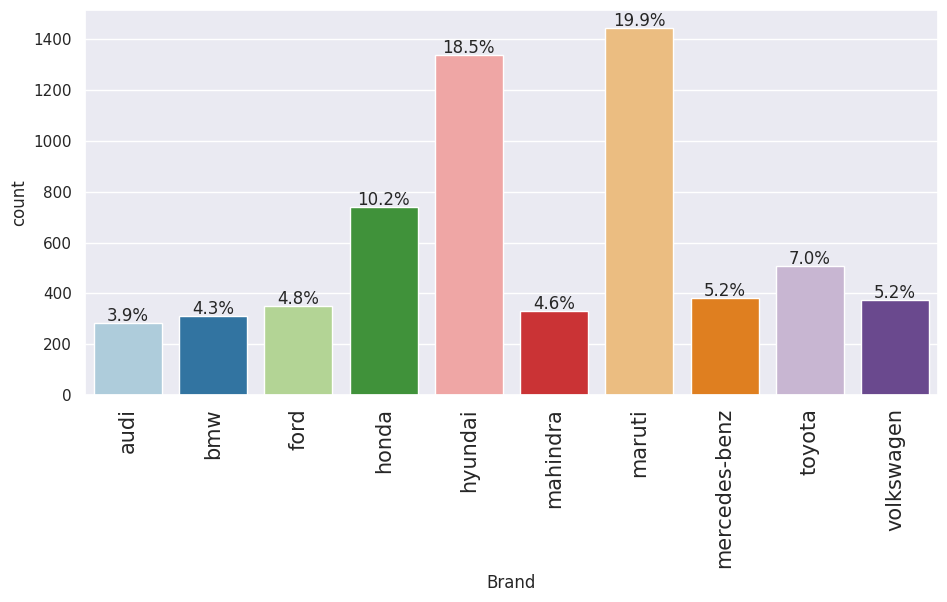

In [53]:
# labeled_barplot(df1, "Brand", perc=True, n=10) # Original incorrect line
create_labelled_barplots(df1, "Brand", title="Distribution of Car Brands", x_label="Brand", y_label="Count", perc=True, n=10) # Corrected line



*   Most of the cars in the data belong to Maruti or Hyundai. The price of used cars is lower for budget brands like Porsche, Bentley, Lamborghini, etc. The price of used cars is higher for premium brands like Maruti, Tata, Fiat, etc.



**bLocation**

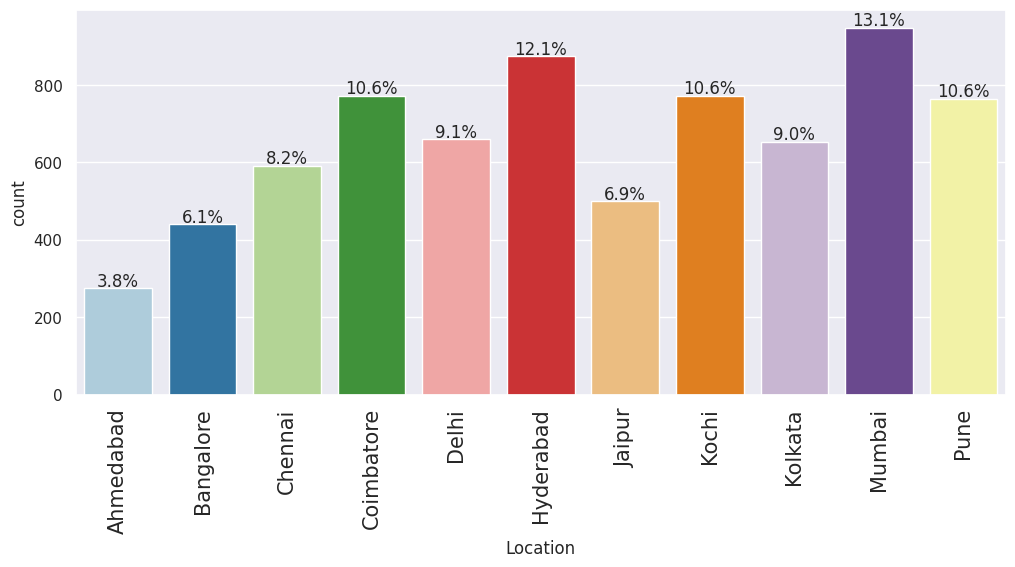

In [54]:
# labeled_barplot(df1, "Location", perc=True) # Original incorrect line
create_labelled_barplots(df1, "Location", title="Distribution of Car Locations", x_label="Location", y_label="Count", perc=True) # Corrected line



*   Hyderabad and Mumbai have the most demand for used cars. The price of used cars has a large IQR in Coimbatore and Bangalore.



**Fuel_Type**

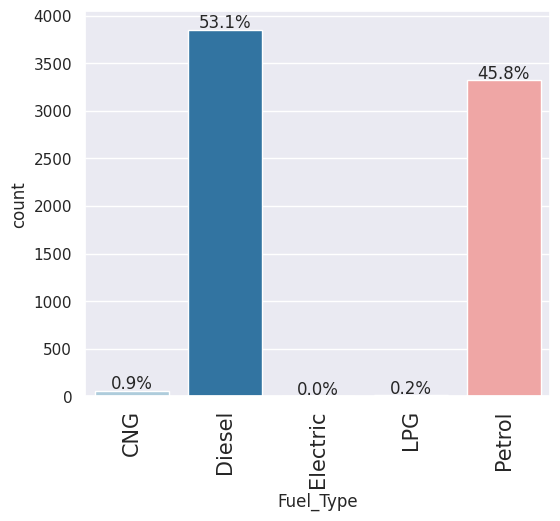

In [55]:
# labeled_barplot(df1, "Fuel_Type", perc=True) # Original incorrect line
create_labelled_barplots(df1, "Fuel_Type", title="Distribution of Fuel Types", x_label="Fuel Type", y_label="Count", perc=True) # Corrected line

**Bivariate Analysis**

Correlation Check

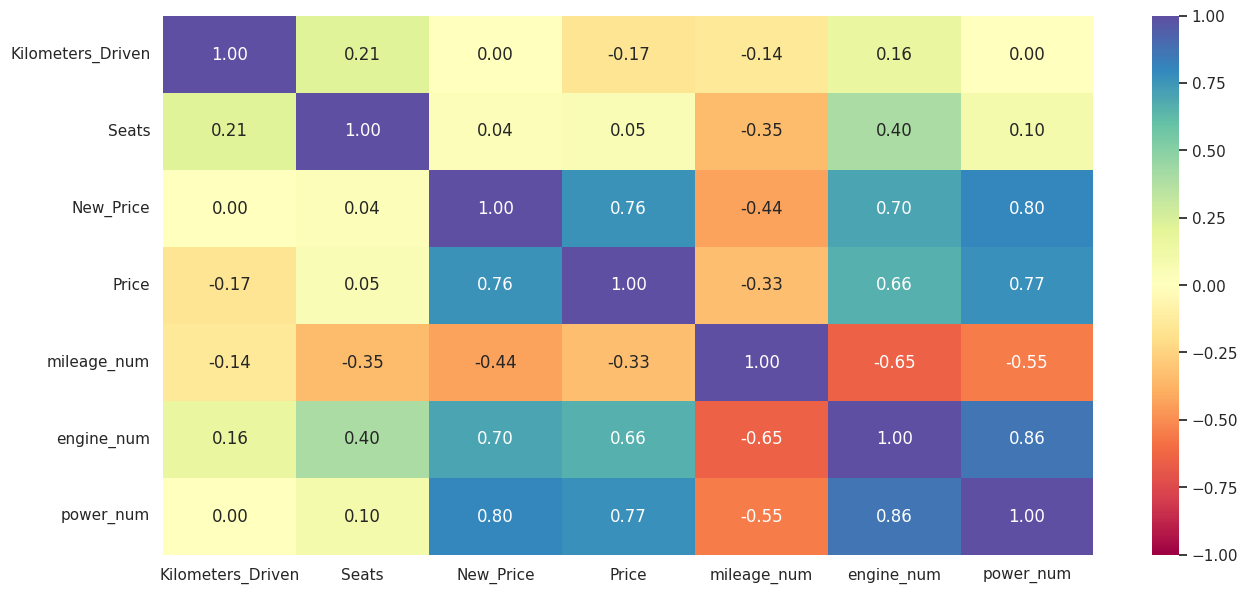

In [56]:
cols_list = df1.select_dtypes(include=np.number).columns.tolist()
# dropping Year as it is a temporal variable
cols_list.remove("Year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**


*   Power and Engine are important predictors of used car price, but the are also highly correlated to each other.

*   The price of the new car of the same model seems to be an important of the used car price, which makes sense



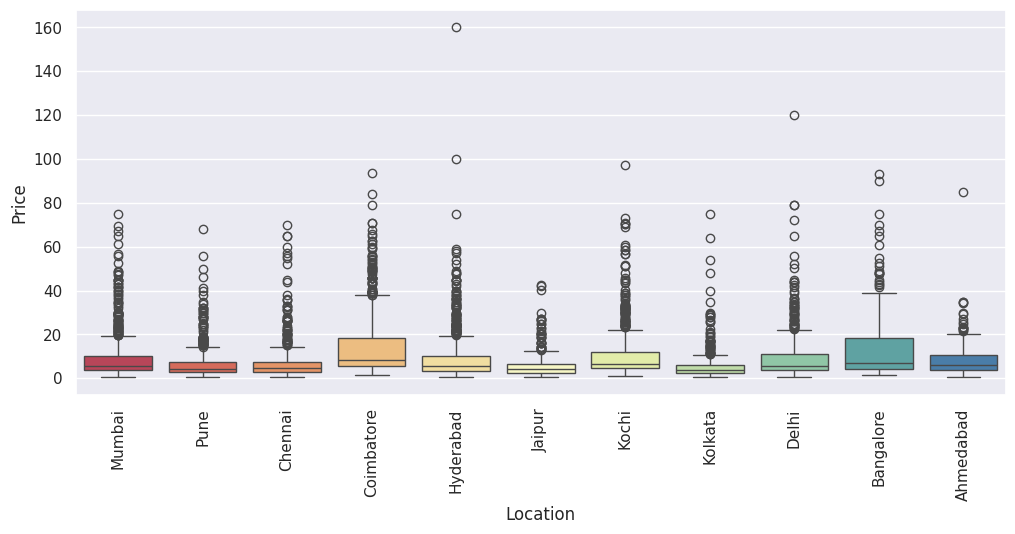

In [58]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="Location", y="Price", data=df1, palette="Spectral")
plt.xticks(rotation=90)
plt.show()



*   The Price of used cars has a large IQR in Coimbatore and Bengalore



Price vs Brand

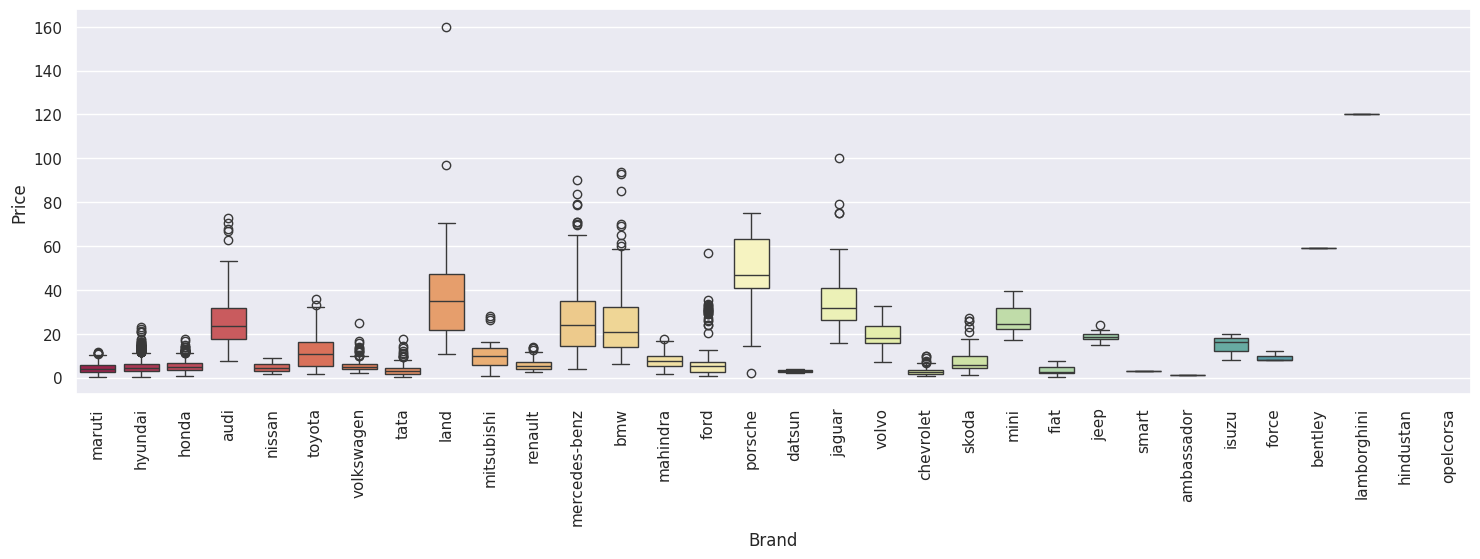

In [59]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Brand", y="Price", data=df1, palette="Spectral")
plt.xticks(rotation=90)
plt.show()


*   The price of used  cars is lower for budget brands like Maruti, tata, Fiat, etc
*   The price of used cars is highe for premium brands like Porsche, Audi, Lamborghini, etc.






Price vs Year

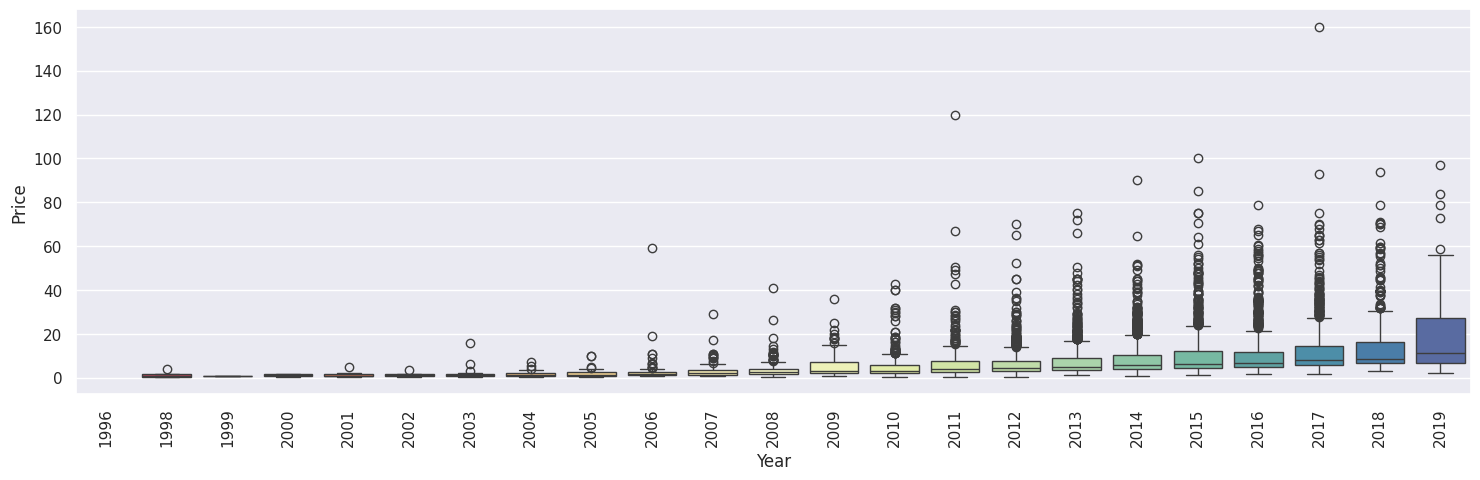

In [60]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Year", y="Price", data=df1, palette="Spectral")
plt.xticks(rotation=90)
plt.show()



*   The price of used cars has increased over the years



# ***Data Preprocessing***
# Missing Value Treatment

In [61]:
# Lets check again for missing values
df.isnull().sum()

,0
Location,0
Year,0
Kilometers_Driven,1
Fuel_Type,0
Transmission,0
Owner_Type,0
Seats,53
New_Price,0
Price,1232
mileage_num,83


In [62]:
# Let's look at a few rows where seat is missing
df[df["Seats"].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
194,Ahmedabad,2007,60006.0,Petrol,Manual,First,NaN,13.580,2.95,NaN,NaN,NaN,honda,city
208,Kolkata,2010,42001.0,Petrol,Manual,First,NaN,7.880,2.11,16.10,NaN,NaN,maruti,swift
229,Bangalore,2015,70436.0,Diesel,Manual,First,NaN,7.650,3.60,NaN,1498.0,99.0,ford,figo
733,Chennai,2006,97800.0,Petrol,Manual,Third,NaN,7.880,1.75,16.10,NaN,NaN,maruti,swift
749,Mumbai,2008,55001.0,Diesel,Automatic,Second,NaN,120.000,26.50,NaN,NaN,NaN,land,rover
1294,Delhi,2009,55005.0,Petrol,Manual,First,NaN,13.580,3.20,12.80,NaN,NaN,honda,city
1327,Hyderabad,2015,50295.0,Petrol,Manual,First,NaN,7.880,5.80,16.10,NaN,NaN,maruti,swift
1385,Pune,2004,115000.0,Petrol,Manual,Second,NaN,13.580,1.50,NaN,NaN,NaN,honda,city
1460,Coimbatore,2008,69078.0,Petrol,Manual,First,NaN,120.000,40.88,NaN,NaN,NaN,land,rover
1917,Jaipur,2005,88000.0,Petrol,Manual,Second,NaN,13.580,1.70,13.00,1493.0,100.0,honda,city


**We'll impute these missing values one-by-one by taking the median number of seats for the particular car using the Brand and Model**

In [63]:
df.groupby(["Brand","Model"], as_index=False)["Seats"].median()

,Brand,Model,Seats
0,ambassador,classic,5.0
1,audi,a3,5.0
2,audi,a4,5.0
3,audi,a6,5.0
4,audi,a7,5.0
...,...,...,...
217,volvo,s60,5.0
218,volvo,s80,5.0
219,volvo,v40,5.0
220,volvo,xc60,5.0


In [64]:
# imputing missing values in Seats
df["Seats"] = df.groupby(["Brand","Model"])["Seats"].transform(
    lambda x: x.fillna(x.median())
)

In [65]:
# Checking missing values in Seats
df[df["Seats"].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,engine_num,power_num,Brand,Model
2369,Chennai,2008,56000.0,Petrol,Manual,Second,NaN,7.88,1.50,19.5,1061.0,NaN,maruti,estilo
3882,Kolkata,2010,40000.0,Petrol,Manual,Second,NaN,7.88,2.50,19.5,1061.0,NaN,maruti,estilo
5893,Chennai,2008,51000.0,Petrol,Manual,Second,NaN,7.88,1.75,19.5,1061.0,NaN,maruti,estilo




*   Maruti Estilo can accommodate 5 people

In [66]:
df["Seats"] = df["Seats"].fillna(5.0)



*   We will use a similar method to fill missing values for the Kilometers_Driven, mileage_num, engine_num, and power_num columns.



In [67]:
cols_list = ["Kilometers_Driven","mileage_num", "engine_num", "power_num"]

for col in cols_list:
    df[col] = df.groupby(["Brand", "Model"])[col].transform(
        lambda x: x.fillna(x.median())
    )

df.isnull().sum()

,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Seats,0
New_Price,0
Price,1232
mileage_num,9




*   There are still some missing values in mileage_num and power_num
*   We'll impute these missing values by taking the median grouped by the Brand


In [68]:
cols_list = ["mileage_num", "power_num"]

for col in cols_list:
    df[col] = df.groupby(["Brand"])[col].transform(lambda x: x.fillna(x.median()))

df.isnull().sum()

,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Seats,0
New_Price,0
Price,1232
mileage_num,1



*  There are still some missing values in mileage_num and power_num
*   We'll impute these missing values using the column median accross the entire data



In [69]:
cols_list = ["mileage_num", "power_num"]

for col in cols_list:
    df[col] = df[col].fillna(df[col].median())

df.isnull().sum()

,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Seats,0
New_Price,0
Price,1232
mileage_num,0




*   Missing values in all columns except Prece are imputed
*   We will drop ows ahere Price is nmissing as it is the target variable



In [70]:
# considering only the data points where price is not missing
df = df[df["Price"].notna()].copy()

# checking for missing values
df.isnull().sum()

,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Seats,0
New_Price,0
Price,0
mileage_num,0




*   All missing values are dealt with


**Model Building - Linear Regression**



1.   We want to predict the used car price
2.   Before we proceed to build a model, we'll have to encode categorical features
3.   We'll split the data into train and test to be able to evaluate the model that we build on the train data
4.   We will build a Linear Regression model using the train datat and then check its performance





In [71]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later

for colname in df.dtypes[df.dtypes == "object"].index:
    val_counts = df[colname].value_counts(dropna=False)  # will also show the NA counts
    print(val_counts[:num_to_display])

    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("-" * 50, "\n")  # just for more space in between

Location
Mumbai        790
Hyderabad     741
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Name: count, dtype: int64
Only displaying first 10 of 11 values.
-------------------------------------------------- 

Fuel_Type
Diesel      3205
Petrol      2745
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64
-------------------------------------------------- 

Transmission
Manual       4298
Automatic    1720
Name: count, dtype: int64
-------------------------------------------------- 

Owner_Type
First             4928
Second             968
Third              113
Fourth & Above       9
Name: count, dtype: int64
-------------------------------------------------- 

Brand
maruti           1210
hyundai          1107
honda             608
toyota            411
mercedes-benz     318
volkswagen        315
ford              300
mahindra          272
bmw               267
audi 

Observations


*   Creating dummy variables for the categorical variable model (211) would increase the number of features in the model extensively.
*   To check the effect of these dummy variables, we can create two models
# New Section

*   One with all the variables
*   One without the model dummy variables


*   This will allow us to see how the dummy variables affect the performance of the model







**Model Performance Check**
Before moving ahead, we define a function to check the performance of the model using different metrics

*   We will be using metric functions defined in sklearn for RMSE, MAE, and R^2
*   We will define function to calculate adjusted R^2
*   We will create a function that will print out all the above metrics in one go




In [72]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

**Data Preparation for modeling with all variables**

In [73]:
# defining the dependent and independent variables
X = df.drop(["Price"], axis=1)
y = df["Price"]

In [74]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X = X.astype(float)

X.head()

,Year,Kilometers_Driven,Seats,New_Price,mileage_num,engine_num,power_num,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_duster,Model_dzire,Model_e,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_fortuner,Model_fortwo,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_prius,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rover,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
0,2010.0,72000.0,5.0,5.51,26.60,998.0,58.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [75]:
X.shape

(6018, 264)

The dataset has 6018 rows and 264 columns

In [76]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [77]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4212
Number of rows in test data = 1806


**Model Building - Linear regression with all variables**

In [80]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression
# fitting a linear model
lin_reg_model1 = LinearRegression()
lin_reg_model1.fit(x_train, y_train)

LinearRegression()

In [81]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model1_perf_train = model_performance_regression(
    lin_reg_model1, x_train, y_train
)
lin_reg_model1_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared
0,4.177332,2.24432,0.86575,0.856771



*   Both the R-squared and Adjusted R squared of our model are high. This is a clear indication that we have been able to create a very good model that is able to explain variance in the price of used cars up to ~87%.
*   The model is not an underfitting model.
*   Let's do a quick performance check on the test data.






In [82]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model1_perf_test = model_performance_regression(lin_reg_model1, x_test, y_test)
lin_reg_model1_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared
0,4.305989,2.387192,0.83718,0.809286




*   Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) of train and test data are close, which indicates that our model is not overfitting the train data.
*   MAE indicates that our current model is able to predict used car prices within a mean error of 4.3 lakhs on test data.
*   The units of both RMSE and MAE are the same, Lakhs in this case. But RMSE is greater than MAE because it penalizes the outliers more.





**Data Preparation for modeling without dummy variables for Model**

In [83]:
# defining the dependent and independent variables
X = df.drop(["Price", "Model"], axis=1)
y = df["Price"]

# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# splitting the data in 70:30 ratio for train to test data

x_train2, x_test2, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

print("Number of rows in train data =", x_train2.shape[0])
print("Number of rows in test data =", x_test2.shape[0])

Number of rows in train data = 4212
Number of rows in test data = 1806


**Model Building - Linear Regression without dummy variables for Model**

In [84]:
# fitting a linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train2, y_train)

LinearRegression()

In [85]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model2_perf_train = model_performance_regression(
    lin_reg_model2, x_train2, y_train
)
lin_reg_model2_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared
0,5.373312,2.885274,0.777874,0.774988


In [86]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model2_perf_test = model_performance_regression(lin_reg_model2, x_test2, y_test)
lin_reg_model2_perf_test


Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared
0,4.708771,2.758357,0.805295,0.799291




*   Both the R-squared and Adjusted R squared of our model are lesser than before and the model is able to explain up to 80% of the variance in the price of used cars.
*   MAE indicates that our current model is able to predict used car prices within a mean error of 2.75 lakhs on test data.


**Model Performance Comparison**

In [87]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model1_perf_train.T, lin_reg_model2_perf_train.T,], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (without dummy variables for Model)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression (all variables),Linear Regression (without dummy variables for Model)
RMSE,4.177332,5.373312
MAE,2.244320,2.885274
R-squared,0.865750,0.777874
Adj. R-squared,0.856771,0.774988


In [88]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model1_perf_test.T, lin_reg_model2_perf_test.T,], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (without dummy variables for Model)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression (all variables),Linear Regression (without dummy variables for Model)
RMSE,4.305989,4.708771
MAE,2.387192,2.758357
R-squared,0.837180,0.805295
Adj. R-squared,0.809286,0.799291


**We will consider lin_reg_model1 (model with all variables) as our final model**

**Business Insights and Recommendations**


*   Our linear regression model has successfully explained approximately 83% of the variation in the data.
*   The Mean Absolute Error (MAE) indicates that our current model can predict used car prices with an average error of around 2.38 lakhs on the test data.
*   Our analysis has revealed that certain factors, such as the year of manufacture, the number of seats, and the maximum power of the engine, tend to increase the price of a used car. Conversely, factors like the distance traveled and engine volume tend to decrease the price of a used car.
*   Certain markets tend to have higher prices, and it would be beneficial for Cars4U to focus on these markets and establish offices in these areas if necessary.
*  We need to gather data on the cost side of things before discussing profitability in the business.
*   After analyzing the data, the next step would be to cluster the different data sets and determine whether we should create multiple models for different locations or car types.



